In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

In [0]:
import torch

In [0]:
x_train = torch.rand(100)

In [0]:
x_train = x_train*20 - 10

In [0]:
y_train = torch.sin(x_train)

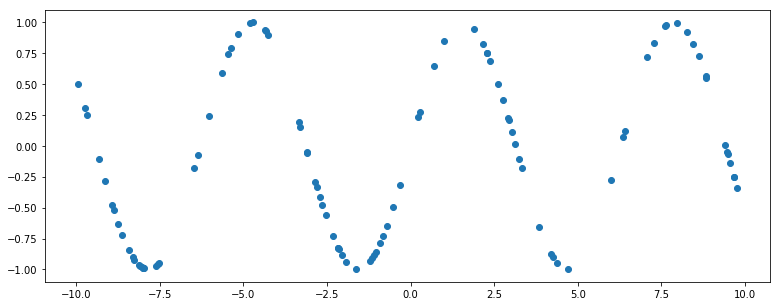

In [6]:
plt.plot(x_train.numpy(), y_train.numpy(), 'o')

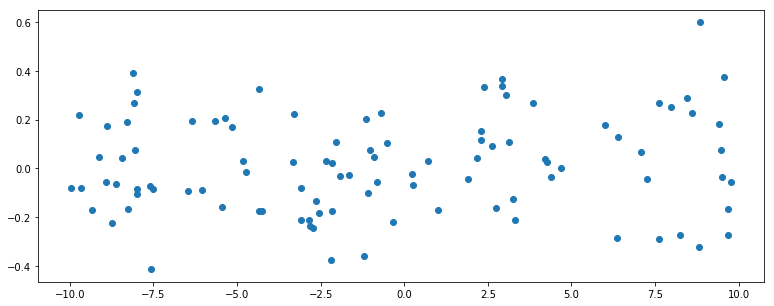

In [7]:
noise = torch.randn(y_train.shape) / 5.
plt.plot(x_train.numpy(), noise.numpy(), 'o')

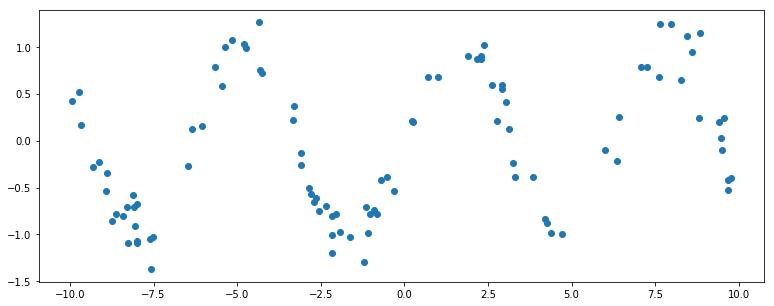

In [8]:
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')

In [0]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

In [0]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)

In [0]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [0]:
class SineNet(torch.nn.Module):
  def __init__(self, n_hidden_neurons):
    super(SineNet, self).__init__()
    self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)
  
  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    return x
  
  
sine_net = SineNet(50)

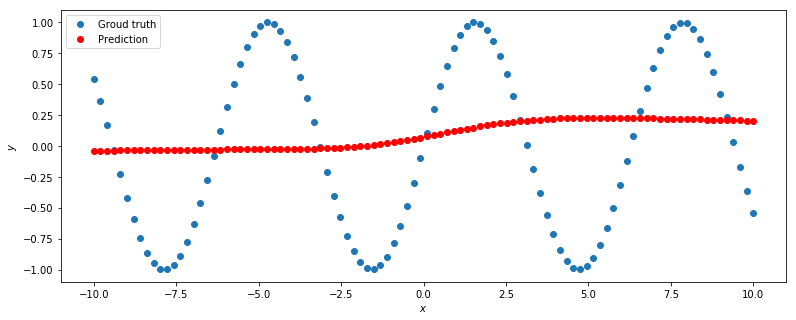

In [20]:
def predict(net, x, y):
  y_pred = net.forward(x)

  plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
  plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
  plt.legend(loc='upper left')
  plt.xlabel('$x$')
  plt.ylabel('$y$')
  
predict(sine_net, x_validation, y_validation)

In [0]:
optimizer = torch.optim.Adam(sine_net.parameters(), lr=0.01)

In [0]:
def loss(pred, target):
  squares = (pred - target) ** 2
  return squares.mean()

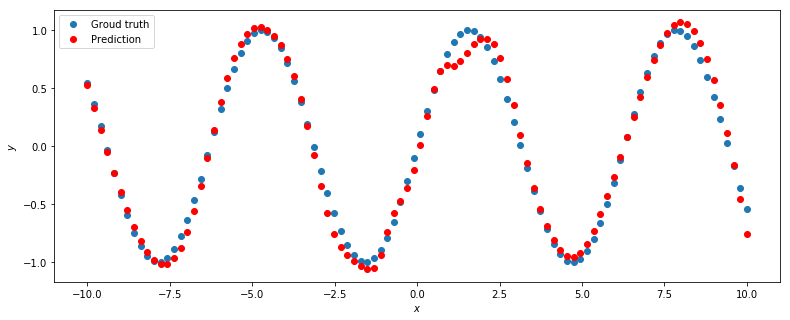

In [25]:
for epoch_index in range(2000):
  optimizer.zero_grad()
  y_pred = sine_net.forward(x_train)
  loss_val = loss(y_pred, y_train)
  loss_val.backward()
  
  optimizer.step()
  
predict(sine_net, x_validation, y_validation)
  